# Trabalho de Regressão Linear
Paula Macedo da Cruz DRE 113049909

Dataset: https://www.kaggle.com/quantbruce/real-estate-price-prediction

In [1]:
import pandas as pd
import numpy as np  # biblioteca que suporta arrays e matrizes multidimensionais - https://numpy.org/
from sklearn import preprocessing # usado para preprocessar a base de dados (normalização)
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns # biblioteca de visualização de dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#1. Justificativa da troca de Dataset
No meu trabalho anterior, eu tinha utilizado um dataset que era relacionado a questão da satisfação de clientes de uma companhia aérea. Para este trabalho, resolvi trocar de dataset, pelo fato do dataset anterior ser mais voltado para classficação e o valor do conceito alvo do mesmo não ser tão indicado para examinar a relação linear entre os atributos.

#2. Novo dataset
Dataset sobre a relação entre os atributos que influenciam o preço do m² de uma casa. Todos os atributos são numéricos. Total de 7 atributos.

Features(6): transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitude, longitude

Target(1): house price of unit area

Com 414 instâncias.

In [2]:
data1 = pd.read_csv("real-estate.csv")
display(data1)



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
data1.describe(include='all')

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


*Eu tinha esquecido de normalizar os dados antes da apresentação da aula de terça.*

Para normalizar os dados, é utilizado *StandardScaler* que é o método mais indicado para problemas de regressão linear ou logística.

In [4]:
data=  data1.copy()

data[[ 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area'  ]] = StandardScaler().fit_transform(data1[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area' ]])

In [5]:
data.drop(labels = ['No'], axis = 1, inplace= True)

In [6]:
display(data)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...,...
409,-0.528967,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,-1.711384,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,0.358734,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,-0.528967,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    float64
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(7)
memory usage: 22.8 KB


Aplicando o método de Pearson. O mesmo facilita a visualização dos atributos que possuem melhor relação linear.

In [8]:
data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


*Eu escolhi focar na relação entre o valor do m² e os outros atributos (Y). Descobrir qual dos atributos tem a melhor correlação linear com Y.*

*Seguindo o método de Pearson, X3 distance to the nearest MRT station tem o melhor  coeficiente de correlação linear com Y house price of unit area, -0.67. O restante dos atributos tem correlação fraca com Y house price of unit area.*

*Também é possível observar que a melhor correlação linear entre atributos deste dataset ocorre entre X6 longitude e X3 distance to the nearest MRT station. A correlação é forte, -0.8 .* 

Checa só se há alguma instância com algum atributo com valor nulo.

In [9]:
data.isnull().any()

X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

In [10]:
Y = data['Y house price of unit area'].to_numpy().reshape(-1,1)

# Checando as relações

**House age X House price**

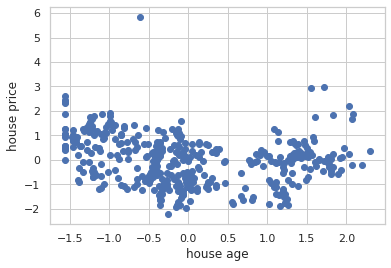

Score: 0.0443384809779116


In [11]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


plt.scatter(data['X2 house age'], data['Y house price of unit area'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("house age")
plt.ylabel("house price")
plt.savefig('pontos1.png')
plt.show()

X2 = data['X2 house age'].to_numpy().reshape(-1,1)
reg_x2 = LinearRegression().fit(X2, Y)
print(f'Score: {reg_x2.score(X2,Y)}')

**Longitude X House price**

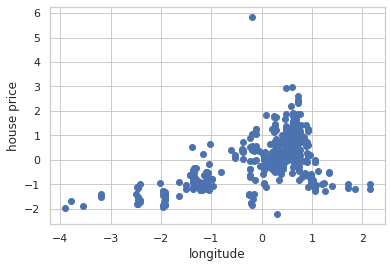

Score: 0.2738287684383738


In [12]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


plt.scatter(data['X6 longitude'], data['Y house price of unit area'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("longitude")
plt.ylabel("house price")
plt.savefig('pontos.png')
plt.show()

X6 = data['X6 longitude'].to_numpy().reshape(-1,1)
reg_x6 = LinearRegression().fit(X6, Y)
print(f'Score: {reg_x6.score(X6,Y)}')

In [13]:
data['X6 longitude'].corr(data['Y house price of unit area'])

0.5232865070287724

existência de correlação positiva

**Latitude X House price**

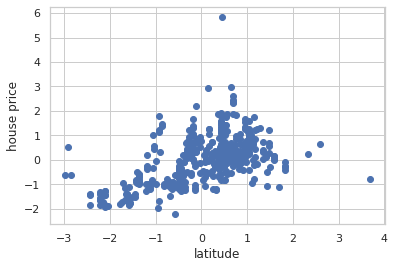

Score: 0.2984509585696773


In [14]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


plt.scatter(data['X5 latitude'], data['Y house price of unit area'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("latitude")
plt.ylabel("house price")
plt.savefig('pontos.png')
plt.show()

X5 = data['X5 latitude'].to_numpy().reshape(-1,1)
reg_x5 = LinearRegression().fit(X5, Y)
print(f'Score: {reg_x5.score(X5,Y)}')

existência de correlação positiva

**Number of convenience stores X House price**

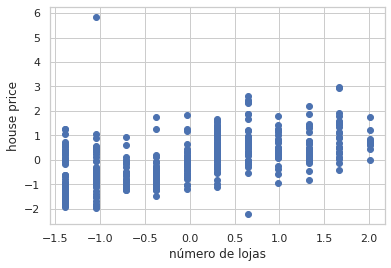

Score: 0.32604660851305056


In [15]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


plt.scatter(data['X4 number of convenience stores'], data['Y house price of unit area'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("número de lojas")
plt.ylabel("house price")
plt.savefig('pontos.png')
plt.show()

X4 = data['X4 number of convenience stores'].to_numpy().reshape(-1,1)
reg_x4 = LinearRegression().fit(X4, Y)
print(f'Score: {reg_x4.score(X4,Y)}')

**Distance to the nearest MRT station X House price**

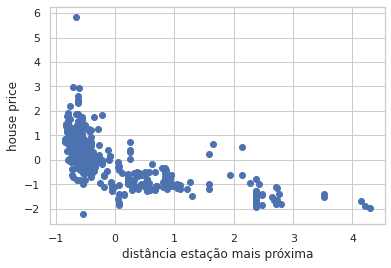

Score: 0.453754278918267


In [16]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


plt.scatter(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("distância estação mais próxima")
plt.ylabel("house price")
plt.savefig('pontos.png')
plt.show()

X3 = data['X3 distance to the nearest MRT station'].to_numpy().reshape(-1,1)
reg_x3 = LinearRegression().fit(X3, Y)
print(f'Score: {reg_x3.score(X3,Y)}')

In [17]:
data['X3 distance to the nearest MRT station'].corr(data['Y house price of unit area'])

-0.6736128553689186

existência de correlação negativa

#3. Dividindo para teste e treino


In [18]:
def linear_regression(X, Y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    plt.scatter(X, Y, marker='o',color='blue')  #pontos originais
    plt.scatter(X_test, y_pred, marker='+',color='red') #pontos previstos
    plt.show()

    plt.scatter(X_train, y_train, marker='x',color='green')  # pontos de treino
    plt.scatter(X_test, y_pred, marker='+',color='red') # pontos previstos a partir do X de teste
    plt.scatter(X_test, y_test, marker='x',color='blue') 
    plt.plot(X_train, reg.predict(X_train), color='gray')
    plt.show()
    
    print(f'Score: {reg.score(X_test, y_test)}')
    print(f'Erro quadrático médio: {mean_squared_error(y_test, y_pred)}')

**longitude**

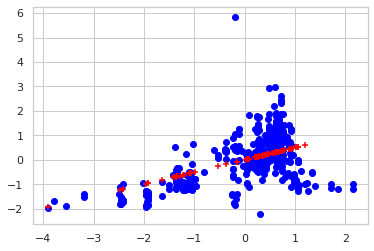

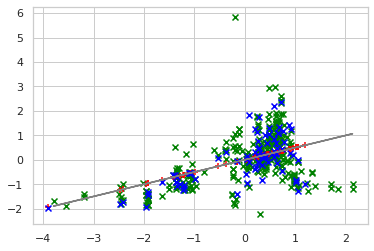

Score: 0.4135615981773917
Erro quadrático médio: 0.524000914218364


In [19]:
linear_regression(X6, Y, test_size=0.2)

**distância da estação mais próxima**

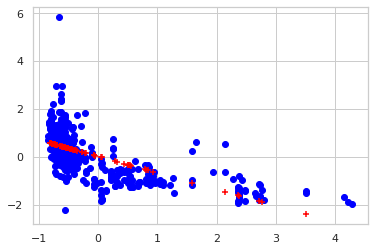

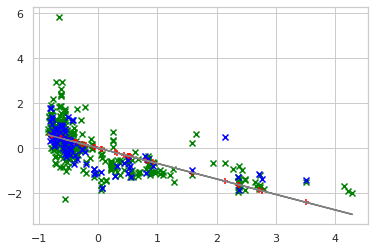

Score: 0.42371064371603095
Erro quadrático médio: 0.41089625023698917


In [20]:
linear_regression(X3, Y, test_size=0.2)

**idade da casa**

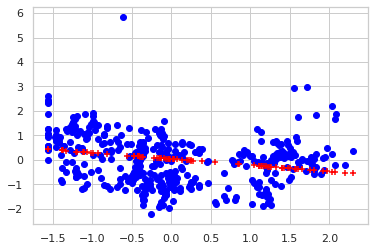

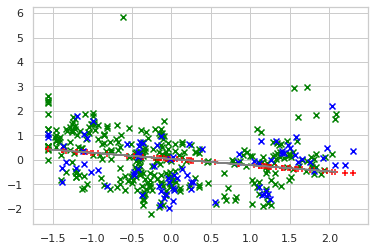

Score: -0.1085281692317881
Erro quadrático médio: 0.8728491061135081


In [21]:
linear_regression(X2, Y, test_size=0.2)

latitude

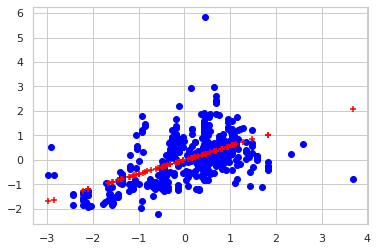

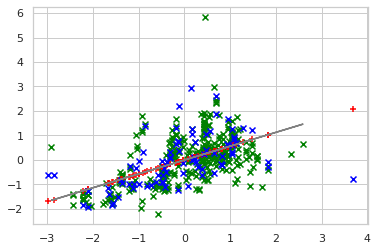

Score: 0.26855572507292325
Erro quadrático médio: 0.7562946557457843


In [22]:
linear_regression(X5, Y, test_size=0.2)

**número de lojas**

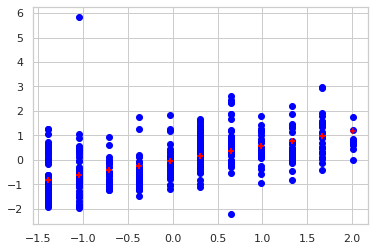

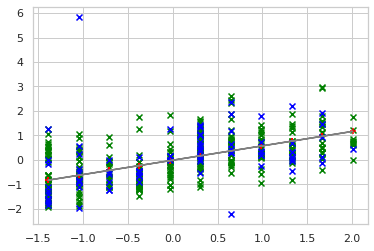

Score: 0.1618499095437392
Erro quadrático médio: 1.1295145135871965


In [23]:
linear_regression(X4, Y, test_size=0.2)

#4. Conclusão

*Como esperado, a regressão linear entre o X3 distance to the nearest MRT station e Y é o que apresenta o menor erro quadrático médio, 0.48. O método de Pearson já havia sinalizado uma possível correlação linear entre estes dois atributos.*

-----------------------------------------------------------------

#5. Trocando o Y para distance to the nearest MRT station



*Se trocarmos o Y por X3 distance to the nearest MRT station e olharmos novamente a tabela de correlação, vemos que Longitute e X3 apresentam uma correlação altíssima.*

*A título de curiosidade, eu apliquei a regressão linear à esses dois atributos. O resultado obtido não teve tanta diferença em relação ao erro encontrado.*

In [24]:
Y2 = data['X3 distance to the nearest MRT station'].to_numpy().reshape(-1,1)

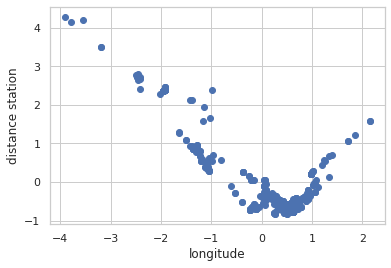

Score: 0.6501467328887787


In [25]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


plt.scatter(data['X6 longitude'], data['X3 distance to the nearest MRT station'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("longitude")
plt.ylabel("distance station")
plt.savefig('pontos.png')
plt.show()

X63 = data['X6 longitude'].to_numpy().reshape(-1,1)
reg_x63 = LinearRegression().fit(X63, Y2)
print(f'Score: {reg_x63.score(X63,Y2)}')

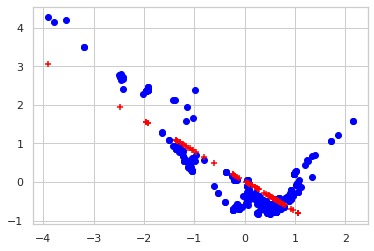

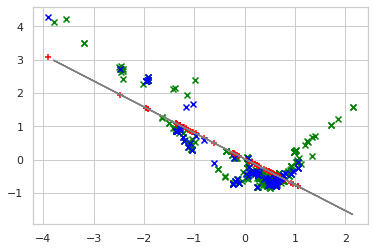

Score: 0.7968688934446884
Erro quadrático médio: 0.19904925465572795


In [26]:
linear_regression(X63, Y2, test_size=0.2)